# Project: Traffic Crash Analysis & Forecasting Severity

**Objective:** The objective of this machine learning project is to develop a predictive model that can predict the severity of traffic collisions. The severity levels will be categorized as 0 or 1 based on the collision's impact.

**Tools Used:** Python, Pandas, Matplotlib, Seaborn, NumPy.

**Skills Demonstrated:** Data Cleaning, Exploratory Data Analysis, Forecasting, Data Visualization, Classification, etc.

**Data Source:** https://catalog.data.gov/dataset/traffic-crashes-resulting-in-injury

The dataset contains a wide range of attributes related to traffic collisions in San Francisco, including geographic information, date and time of the collisions, weather conditions, road conditions, lighting, and more.

### Problem Definition:
-  This project aims to address the following key questions:
    - Can we accurately predict the severity of a traffic collision based on various attributes related to the collision?
    - What factors contribute to the severity of traffic accidents in San Francisco?
-  Specifically, the problem involves:
    - Classification: Developing a machine learning model to predict the collision severity category (Minor, Moderate, Severe) based on input features.
    - Feature importance: Identifying which attributes have the most significant influence on collision severity.
- The target variable for classification is "collision_severity."

### Importing the required packages.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Ignore all warnings
warnings.filterwarnings('ignore')

### Loading The Data

In [3]:
df = pd.read_csv('Traffic_Crashes_Resulting_in_Injury.csv', low_memory=False)
df.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,15414,23926000,NaN,151003670,37.777857,-122.406436,SFPD-CROSSROADS,CITY STREET,11/18/2015 09:04:00 AM,2015 November 18,...,Proceeding Straight,POINT (-122.40643 37.777855),11/18/2015 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:17 AM,32.0,32.0,1.0,10.0,34.0
1,52640,23969000,NaN,200212108,37.754453,-122.408343,SFPD-INTERIM DB,CITY STREET,03/28/2020 02:35:00 PM,2020 March 28,...,Proceeding Straight,POINT (-122.40834 37.75445),04/02/2020 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:23 AM,53.0,53.0,3.0,2.0,20.0
2,36577,22495000,5408000.0,140836694,37.714040,-122.461135,SFPD-CROSSROADS,CITY STREET,10/04/2014 01:25:00 PM,2014 October 04,...,Proceeding Straight,POINT (-122.461136 37.71404),10/04/2014 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:23 AM,81.0,81.0,10.0,1.0,24.0
3,27582,24726000,9299000.0,160732947,37.791627,-122.402516,SFPD-CROSSROADS,CITY STREET,09/08/2016 02:00:00 PM,2016 September 08,...,Not Stated,POINT (-122.40252 37.791626),09/08/2016 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:23 AM,108.0,108.0,6.0,3.0,8.0
4,14911,23811000,179000.0,180566685,37.779856,-122.394008,SFPD-INTERIM DB,CITY STREET,07/30/2018 11:25:00 AM,2018 July 30,...,NaN,POINT (-122.394005 37.779858),10/22/2018 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:25 AM,31.0,31.0,1.0,10.0,8.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56009 entries, 0 to 56008
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique_id                     56009 non-null  int64  
 1   cnn_intrsctn_fkey             56009 non-null  int64  
 2   cnn_sgmt_fkey                 25199 non-null  float64
 3   case_id_pkey                  56009 non-null  object 
 4   tb_latitude                   55862 non-null  float64
 5   tb_longitude                  55862 non-null  float64
 6   geocode_source                56009 non-null  object 
 7   geocode_location              56009 non-null  object 
 8   collision_datetime            56009 non-null  object 
 9   collision_date                56009 non-null  object 
 10  collision_time                55953 non-null  object 
 11  accident_year                 56009 non-null  int64  
 12  month                         56009 non-null  object 
 13  d

In [5]:
df.describe()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,tb_latitude,tb_longitude,accident_year,distance,number_killed,number_injured,party_at_fault,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
count,56009.000000,5.600900e+04,2.519900e+04,55862.000000,55862.000000,56009.000000,55930.000000,56006.000000,56009.000000,50463.000000,55236.000000,55236.000000,55778.000000,55817.000000,55804.000000
mean,29632.929654,2.587432e+07,6.971339e+06,37.765905,-122.428868,2013.565213,56.946826,0.009588,1.257994,1.013495,53.745474,53.745474,5.163129,6.619238,20.693803
std,17521.588792,4.920412e+06,4.075008e+06,0.024434,0.028407,5.196015,273.890229,0.099624,0.703334,0.126210,32.679027,32.679027,2.979027,3.375530,12.332206
min,1.000000,2.000600e+07,1.000000e+05,37.707459,-122.513616,2005.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,14613.000000,2.387100e+07,3.454500e+06,37.749041,-122.443431,2009.000000,0.000000,0.000000,1.000000,1.000000,28.000000,28.000000,3.000000,3.000000,9.000000
50%,29148.000000,2.493600e+07,7.311000e+06,37.772569,-122.421578,2014.000000,0.000000,0.000000,1.000000,1.000000,50.000000,50.000000,4.000000,7.000000,20.000000
75%,43664.000000,2.670400e+07,1.014700e+07,37.783933,-122.408490,2018.000000,52.000000,0.000000,1.000000,1.000000,86.000000,86.000000,8.000000,10.000000,34.000000
max,61487.000000,5.436600e+07,1.999910e+07,37.829991,-122.358328,2023.000000,26400.000000,3.000000,19.000000,5.000000,117.000000,117.000000,10.000000,11.000000,41.000000


In [6]:
df.isnull().sum()

unique_id                           0
cnn_intrsctn_fkey                   0
cnn_sgmt_fkey                   30810
case_id_pkey                        0
tb_latitude                       147
tb_longitude                      147
geocode_source                      0
geocode_location                    0
collision_datetime                  0
collision_date                      0
collision_time                     56
accident_year                       0
month                               0
day_of_week                         8
time_cat                           51
juris                               0
officer_id                       1064
reporting_district               6510
beat_number                      4369
primary_rd                          0
secondary_rd                       92
distance                           79
direction                           1
weather_1                           0
weather_2                         796
collision_severity                  0
type_of_coll

In [7]:
df.shape

(56009, 60)

In [8]:
df.columns

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

### Exploratory Data Analysis (EDA)

In [9]:
selected_features = ['collision_severity','weather_1', 'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
                     'type_of_collision', 'party1_type', 'party2_type', 'party1_dir_of_travel', 'party2_dir_of_travel']


In [10]:
df1 = df[selected_features]

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56009 entries, 0 to 56008
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collision_severity    56009 non-null  object
 1   weather_1             56009 non-null  object
 2   road_surface          56009 non-null  object
 3   road_cond_1           56009 non-null  object
 4   road_cond_2           56009 non-null  object
 5   lighting              56009 non-null  object
 6   type_of_collision     56009 non-null  object
 7   party1_type           55998 non-null  object
 8   party2_type           52027 non-null  object
 9   party1_dir_of_travel  55998 non-null  object
 10  party2_dir_of_travel  52029 non-null  object
dtypes: object(11)
memory usage: 4.7+ MB


In [12]:
df1.head(5)

,collision_severity,weather_1,road_surface,road_cond_1,road_cond_2,lighting,type_of_collision,party1_type,party2_type,party1_dir_of_travel,party2_dir_of_travel
0,Injury (Complaint of Pain),Clear,Dry,No Unusual Condition,Not Stated,Daylight,Other,Driver,Bicyclist,East,East
1,Injury (Other Visible),Cloudy,Dry,No Unusual Condition,Not Stated,Daylight,Broadside,Bicyclist,Driver,East,South
2,Injury (Complaint of Pain),Clear,Dry,No Unusual Condition,Not Stated,Daylight,Vehicle/Pedestrian,Driver,Pedestrian,North,West
3,Injury (Other Visible),Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Not Stated,Parked Vehicle,Bicyclist,South,South
4,Injury (Severe),Clear,Dry,"Holes, Deep Ruts",Not Stated,Daylight,Not Stated,Bicyclist,NaN,North,NaN


In [13]:
df1.isna().sum()

collision_severity         0
weather_1                  0
road_surface               0
road_cond_1                0
road_cond_2                0
lighting                   0
type_of_collision          0
party1_type               11
party2_type             3982
party1_dir_of_travel      11
party2_dir_of_travel    3980
dtype: int64

In [14]:
df['collision_severity'].unique()

array(['Injury (Complaint of Pain)', 'Injury (Other Visible)',
       'Injury (Severe)', 'Fatal', 'Medical'], dtype=object)

### Dropping unneccessary columns

In [15]:
unselected_features = df.drop(selected_features,axis=1)

In [16]:
unselected_features.shape

(56009, 49)

In [17]:
unselected_features.head()

,unique_id,cnn_intrsctn_fkey,cnn_sgmt_fkey,case_id_pkey,tb_latitude,tb_longitude,geocode_source,geocode_location,collision_datetime,collision_date,...,party2_move_pre_acc,point,data_as_of,data_updated_at,data_loaded_at,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods
0,15414,23926000,NaN,151003670,37.777857,-122.406436,SFPD-CROSSROADS,CITY STREET,11/18/2015 09:04:00 AM,2015 November 18,...,Proceeding Straight,POINT (-122.40643 37.777855),11/18/2015 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:17 AM,32.0,32.0,1.0,10.0,34.0
1,52640,23969000,NaN,200212108,37.754453,-122.408343,SFPD-INTERIM DB,CITY STREET,03/28/2020 02:35:00 PM,2020 March 28,...,Proceeding Straight,POINT (-122.40834 37.75445),04/02/2020 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:23 AM,53.0,53.0,3.0,2.0,20.0
2,36577,22495000,5408000.0,140836694,37.714040,-122.461135,SFPD-CROSSROADS,CITY STREET,10/04/2014 01:25:00 PM,2014 October 04,...,Proceeding Straight,POINT (-122.461136 37.71404),10/04/2014 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:23 AM,81.0,81.0,10.0,1.0,24.0
3,27582,24726000,9299000.0,160732947,37.791627,-122.402516,SFPD-CROSSROADS,CITY STREET,09/08/2016 02:00:00 PM,2016 September 08,...,Not Stated,POINT (-122.40252 37.791626),09/08/2016 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:23 AM,108.0,108.0,6.0,3.0,8.0
4,14911,23811000,179000.0,180566685,37.779856,-122.394008,SFPD-INTERIM DB,CITY STREET,07/30/2018 11:25:00 AM,2018 July 30,...,NaN,POINT (-122.394005 37.779858),10/22/2018 12:00:00 AM,04/26/2023 12:00:00 AM,09/30/2023 03:30:25 AM,31.0,31.0,1.0,10.0,8.0


In [18]:
unselected_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56009 entries, 0 to 56008
Data columns (total 49 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unique_id                     56009 non-null  int64  
 1   cnn_intrsctn_fkey             56009 non-null  int64  
 2   cnn_sgmt_fkey                 25199 non-null  float64
 3   case_id_pkey                  56009 non-null  object 
 4   tb_latitude                   55862 non-null  float64
 5   tb_longitude                  55862 non-null  float64
 6   geocode_source                56009 non-null  object 
 7   geocode_location              56009 non-null  object 
 8   collision_datetime            56009 non-null  object 
 9   collision_date                56009 non-null  object 
 10  collision_time                55953 non-null  object 
 11  accident_year                 56009 non-null  int64  
 12  month                         56009 non-null  object 
 13  d

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56009 entries, 0 to 56008
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collision_severity    56009 non-null  object
 1   weather_1             56009 non-null  object
 2   road_surface          56009 non-null  object
 3   road_cond_1           56009 non-null  object
 4   road_cond_2           56009 non-null  object
 5   lighting              56009 non-null  object
 6   type_of_collision     56009 non-null  object
 7   party1_type           55998 non-null  object
 8   party2_type           52027 non-null  object
 9   party1_dir_of_travel  55998 non-null  object
 10  party2_dir_of_travel  52029 non-null  object
dtypes: object(11)
memory usage: 4.7+ MB


In [20]:
df1.columns

Index(['collision_severity', 'weather_1', 'road_surface', 'road_cond_1',
       'road_cond_2', 'lighting', 'type_of_collision', 'party1_type',
       'party2_type', 'party1_dir_of_travel', 'party2_dir_of_travel'],
      dtype='object')

In [21]:
categorical_columns = ['collision_severity', 'weather_1', 'road_surface', 'road_cond_1',
       'road_cond_2', 'lighting', 'type_of_collision', 'party1_type',
       'party2_type', 'party1_dir_of_travel', 'party2_dir_of_travel']


In [22]:
df1 = df1.dropna()

In [23]:
df1.isna().sum()

collision_severity      0
weather_1               0
road_surface            0
road_cond_1             0
road_cond_2             0
lighting                0
type_of_collision       0
party1_type             0
party2_type             0
party1_dir_of_travel    0
party2_dir_of_travel    0
dtype: int64

In [24]:
df1.shape

(52018, 11)

### Encoding categorical columns & Getting highest correlation

In [59]:
from sklearn.preprocessing import LabelEncoder

# List of selected columns
selected_features = ['result', 'weather_1', 'road_surface', 'road_cond_1',
       'road_cond_2', 'lighting', 'type_of_collision', 'party1_type',
       'party2_type', 'party1_dir_of_travel', 'party2_dir_of_travel']


# Subset the DataFrame with selected columns
df_selected = df1[selected_features]

# List of columns with object dtype (assumed categorical)
categorical_columns = df_selected.select_dtypes(include=['object']).columns.tolist()

# Label encode categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    if col in df_selected.columns:
        df_selected[col] = label_encoder.fit_transform(df_selected[col].astype(str))

# Compute correlation matrix
correlation_matrix = df_selected.corr()

# # Get highest correlated columns with 'collision_severity'
# highest_corr_cols = correlation_matrix.abs().nlargest(10, 'collision_severity')['collision_severity'].index.tolist()

# # Display highest correlated columns
# print("Highest Correlated Columns with 'collision_severity' column:")
# print(highest_corr_cols)


In [60]:
# Compute correlation matrix
correlation_matrix = df_selected.corr()
correlation_matrix

,result,weather_1,road_surface,road_cond_1,road_cond_2,lighting,type_of_collision,party1_type,party2_type,party1_dir_of_travel,party2_dir_of_travel
result,1.000000,-0.007972,-0.010816,0.001891,0.001080,-0.061225,0.035782,0.089015,0.086505,0.002859,0.035782
weather_1,-0.007972,1.000000,0.737991,0.051441,-0.010533,-0.110452,0.046645,0.025775,0.086813,-0.001389,0.017249
road_surface,-0.010816,0.737991,1.000000,0.035752,-0.009907,-0.125327,0.040125,0.019280,0.099721,-0.003885,0.023547
road_cond_1,0.001891,0.051441,0.035752,1.000000,-0.022930,0.032660,0.008826,-0.005555,0.012827,-0.009902,0.001772
road_cond_2,0.001080,-0.010533,-0.009907,-0.022930,1.000000,0.004736,-0.006228,0.003150,-0.009707,0.005001,-0.008109
lighting,-0.061225,-0.110452,-0.125327,0.032660,0.004736,1.000000,-0.011179,-0.042720,-0.078655,-0.017473,-0.056052
type_of_collision,0.035782,0.046645,0.040125,0.008826,-0.006228,-0.011179,1.000000,0.269155,0.302819,-0.003894,-0.048310
party1_type,0.089015,0.025775,0.019280,-0.005555,0.003150,-0.042720,0.269155,1.000000,-0.162444,0.006983,-0.030649
party2_type,0.086505,0.086813,0.099721,0.012827,-0.009707,-0.078655,0.302819,-0.162444,1.000000,0.009059,0.254858
party1_dir_of_travel,0.002859,-0.001389,-0.003885,-0.009902,0.005001,-0.017473,-0.003894,0.006983,0.009059,1.000000,0.191653


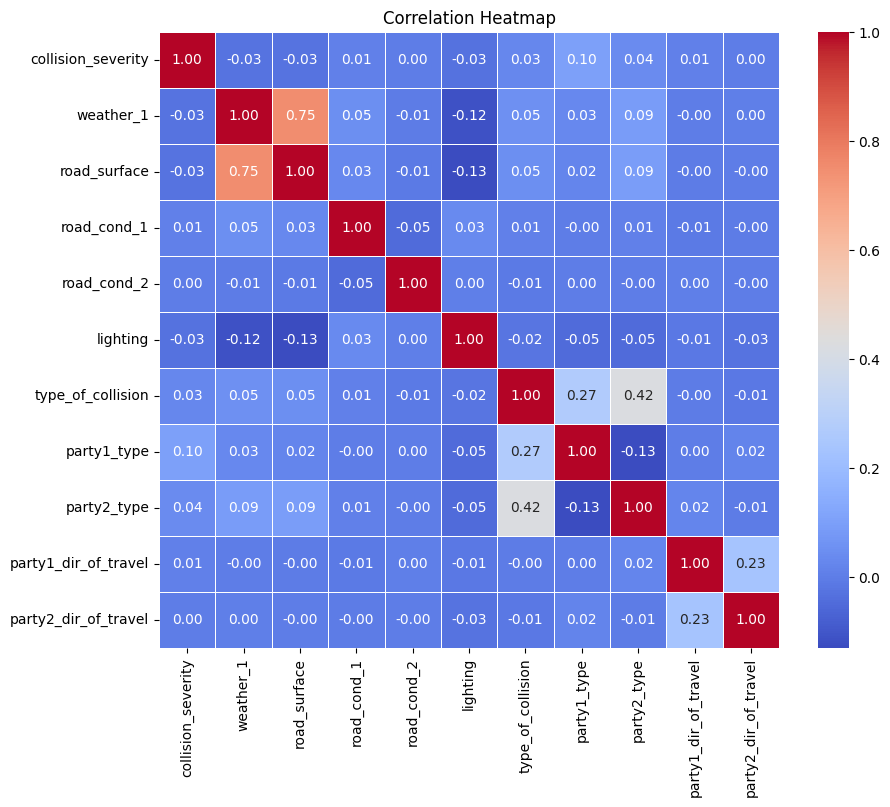

In [47]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Checking the Data balance

In [50]:
df['result'] = np.where((df['collision_severity'] == 'Fatal') | (df['collision_severity'] == 'Injury (Severe)'), 1, 0)
df.columns

Index(['unique_id', 'cnn_intrsctn_fkey', 'cnn_sgmt_fkey', 'case_id_pkey',
       'tb_latitude', 'tb_longitude', 'geocode_source', 'geocode_location',
       'collision_datetime', 'collision_date', 'collision_time',
       'accident_year', 'month', 'day_of_week', 'time_cat', 'juris',
       'officer_id', 'reporting_district', 'beat_number', 'primary_rd',
       'secondary_rd', 'distance', 'direction', 'weather_1', 'weather_2',
       'collision_severity', 'type_of_collision', 'mviw', 'ped_action',
       'road_surface', 'road_cond_1', 'road_cond_2', 'lighting',
       'control_device', 'intersection', 'vz_pcf_code', 'vz_pcf_group',
       'vz_pcf_description', 'vz_pcf_link', 'number_killed', 'number_injured',
       'street_view', 'dph_col_grp', 'dph_col_grp_description',
       'party_at_fault', 'party1_type', 'party1_dir_of_travel',
       'party1_move_pre_acc', 'party2_type', 'party2_dir_of_travel',
       'party2_move_pre_acc', 'point', 'data_as_of', 'data_updated_at',
       'data_

In [53]:
df['collision_severity'].value_counts()

collision_severity
Injury (Complaint of Pain)    35648
Injury (Other Visible)        15977
Injury (Severe)                3859
Fatal                           524
Medical                           1
Name: count, dtype: int64

In [52]:
df['result'].value_counts()

result
0    51626
1     4383
Name: count, dtype: int64

In [54]:
df1 = df

In [55]:
df1['collision_severity'].value_counts()

collision_severity
Injury (Complaint of Pain)    35648
Injury (Other Visible)        15977
Injury (Severe)                3859
Fatal                           524
Medical                           1
Name: count, dtype: int64

<Axes: xlabel='collision_severity'>

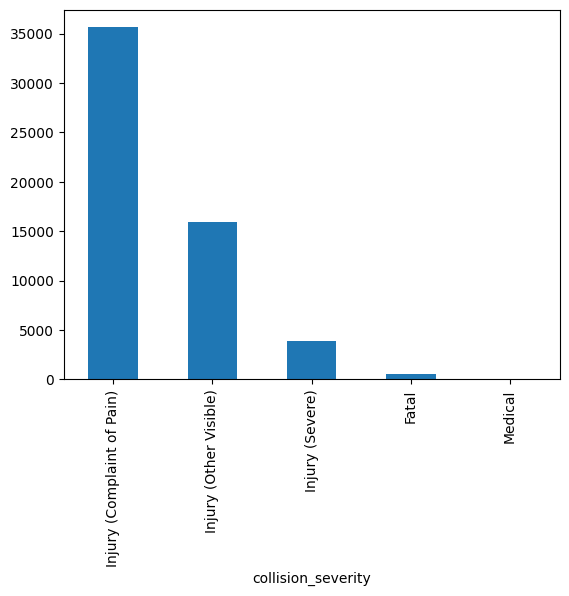

In [56]:
# check the data balance for collision_severity
df1['collision_severity'].value_counts().plot.bar()

In [57]:
target_variable = 'collision_severity'

severity_distribution = df_selected[target_variable].value_counts()

print(f"Distribution of '{target_variable}' column:")
print(severity_distribution)

# Calculate the imbalance ratio
imbalance_ratio = severity_distribution.min() / severity_distribution.max()

if imbalance_ratio >= 1:  
    print("The data is imbalanced.")
else:
    print("The data is balanced.")


Distribution of 'collision_severity' column:
collision_severity
1    33957
2    14244
3     3365
0      452
Name: count, dtype: int64
The data is balanced.


In [31]:
df_selected

,collision_severity,weather_1,road_surface,road_cond_1,road_cond_2,lighting,type_of_collision,party1_type,party2_type,party1_dir_of_travel,party2_dir_of_travel
0,1,0,0,5,3,3,4,2,0,0,0
1,2,1,0,5,3,3,0,1,1,0,3
2,1,0,0,5,3,3,8,2,5,1,4
3,2,5,1,6,3,5,3,5,0,3,3
6,1,0,0,5,3,3,0,2,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...
56004,1,0,0,5,3,3,0,2,1,1,0
56005,2,0,0,5,3,3,6,2,1,3,3
56006,1,0,0,5,3,3,0,2,1,3,0
56007,2,0,0,5,3,5,0,2,1,0,3


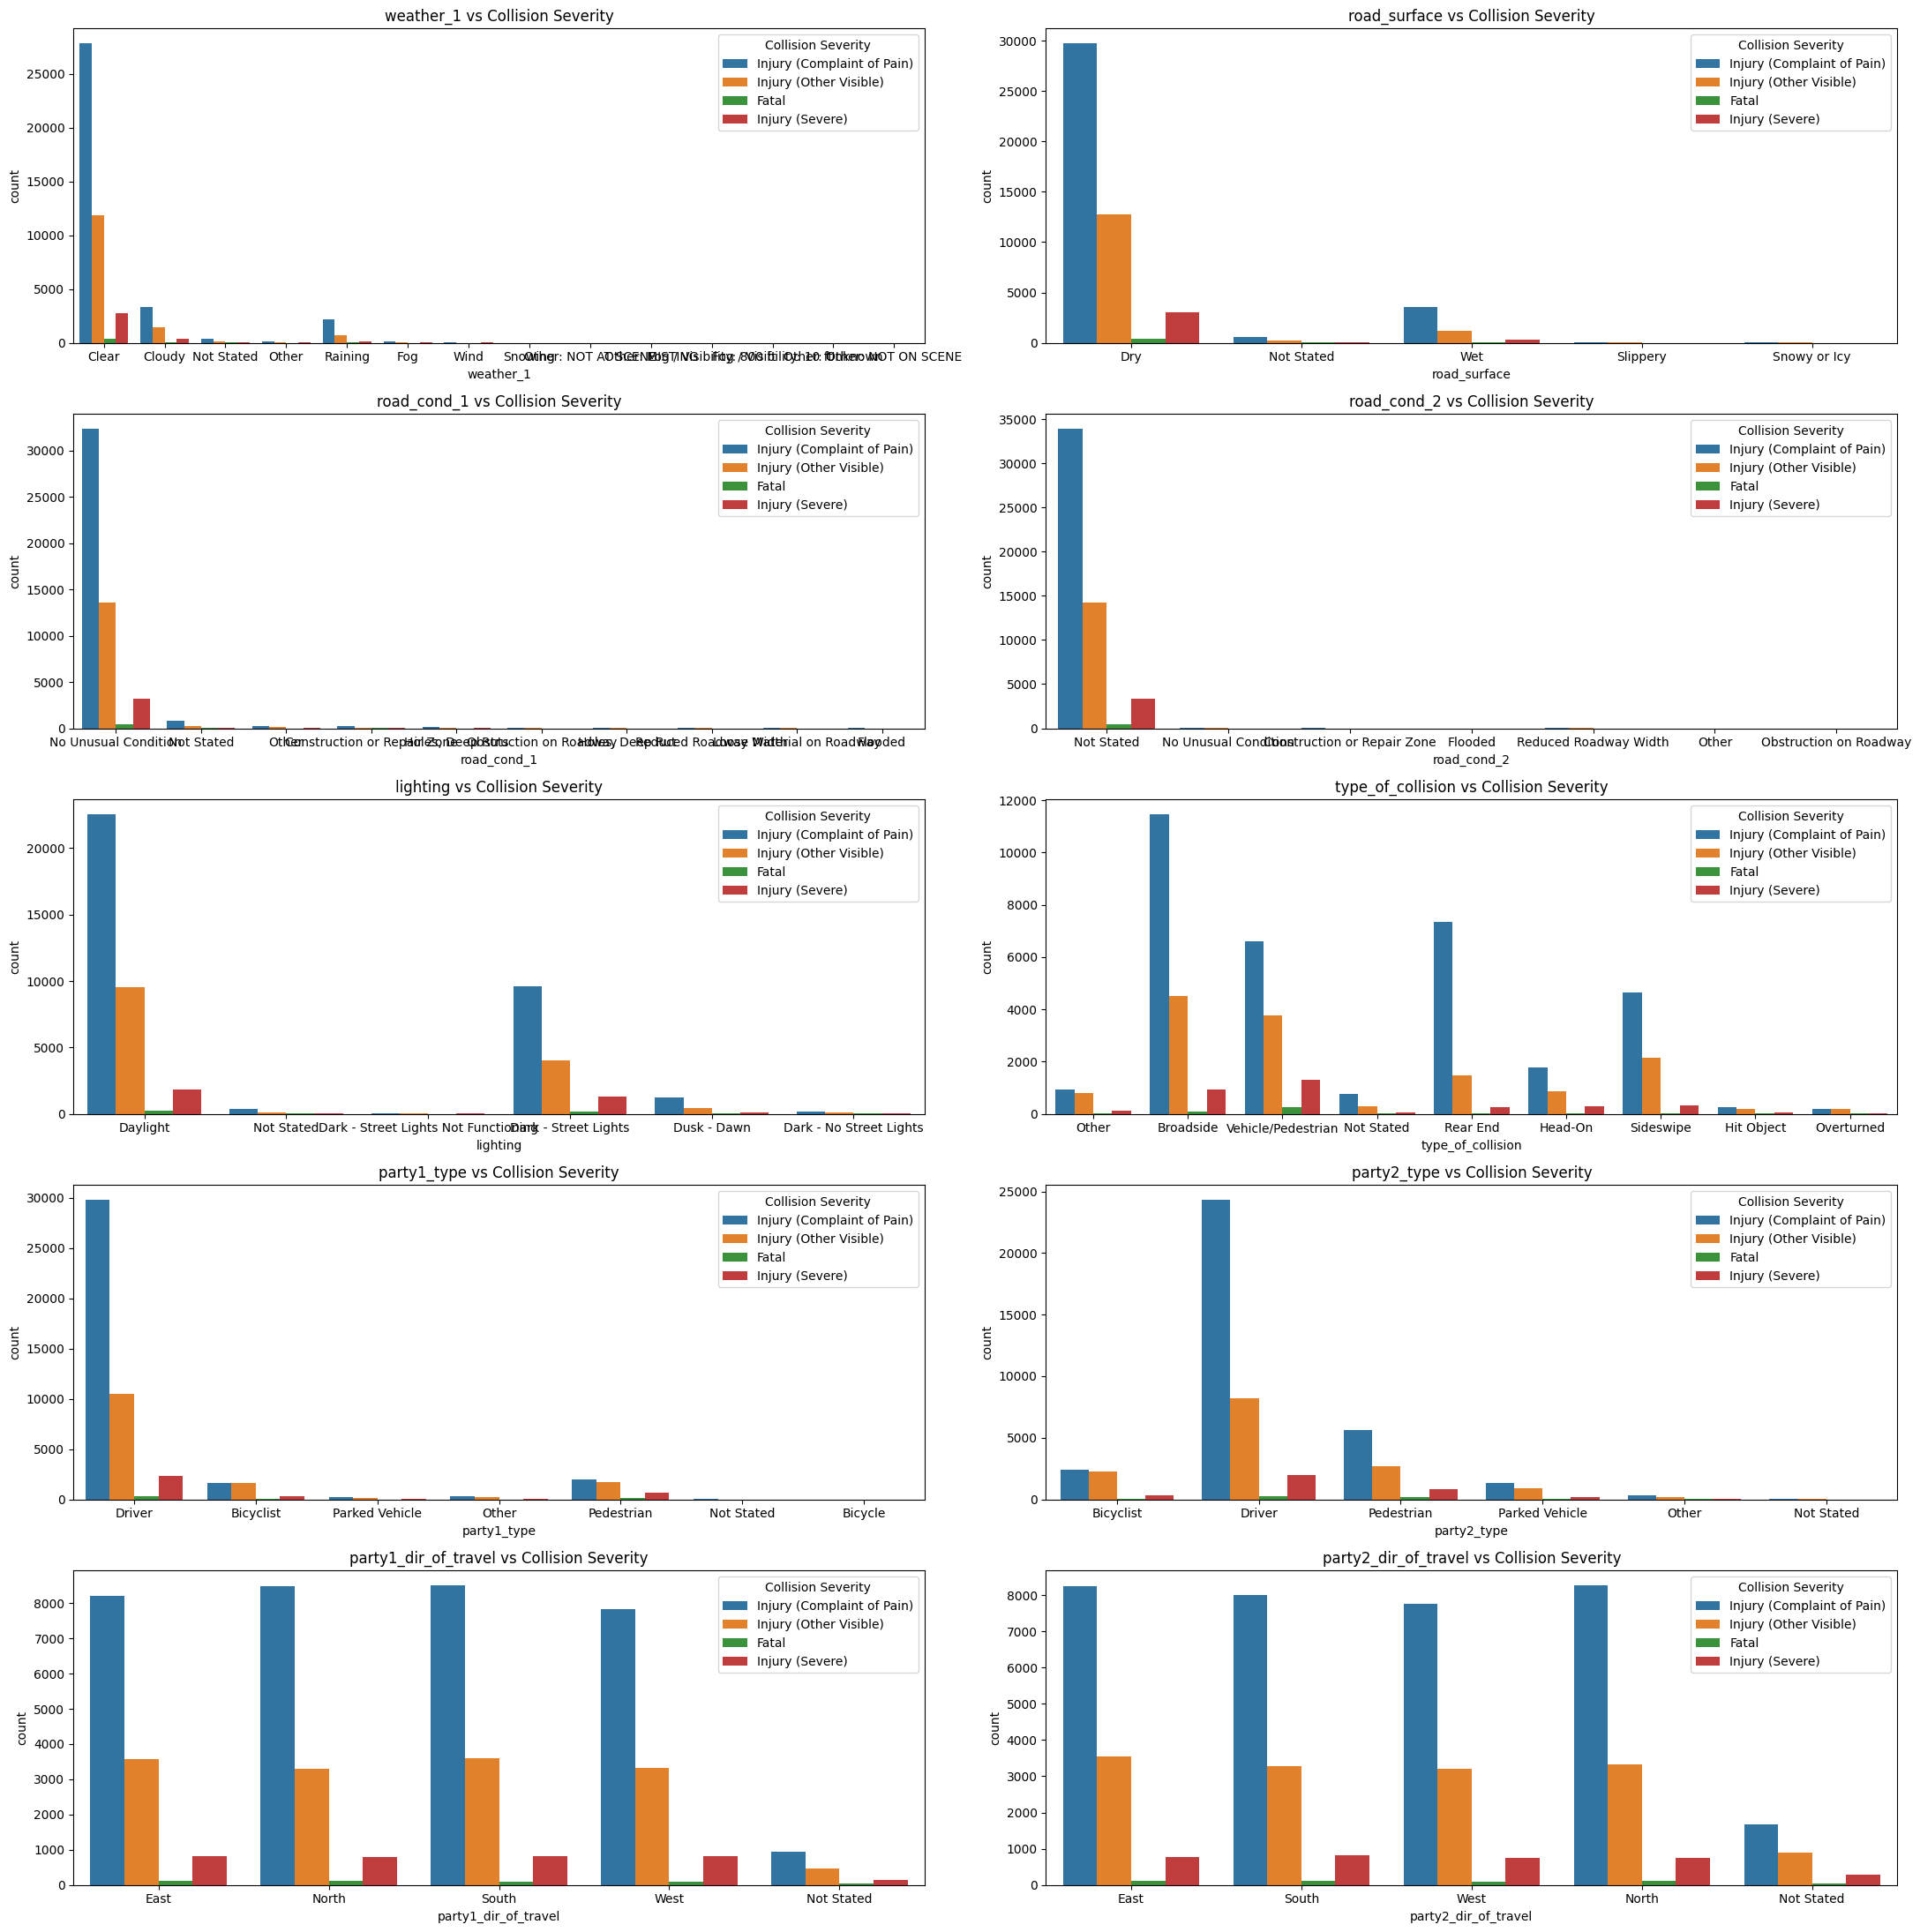

In [32]:
# Select columns for comparison
selected_columns = ['weather_1', 'road_surface', 'road_cond_1', 'road_cond_2',
                    'lighting', 'type_of_collision', 'party1_type', 'party2_type', 'party1_dir_of_travel',
                    'party2_dir_of_travel', 'collision_severity']

# Subset the DataFrame with selected columns
df_s1 = df1[selected_columns]

# Set up figure and axes for subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(22, 22))

# Flatten the axes for easy iteration
axs = axs.flatten()

# Plot each column against 'collision_severity'
for i, column in enumerate(df_s1.columns[:-1]):  # Exclude 'collision_severity'
    sns.countplot(x=column, hue='collision_severity', data=df_s1, ax=axs[i])
    axs[i].set_title(f'{column} vs Collision Severity')
    axs[i].legend(title='Collision Severity')

# Adjust layout
plt.tight_layout()
plt.show()


### Data Preprocessing

In [77]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [61]:
# split the data in X and Y
X = df_selected[['weather_1', 'road_surface', 'road_cond_1', 'road_cond_2',
                 'lighting', 'type_of_collision', 'party1_type', 'party2_type', 'party1_dir_of_travel',
                 'party2_dir_of_travel']]
Y = df_selected['result']


In [80]:
oversampler = RandomOverSampler(sampling_strategy='auto')
X_resampled, y_resampled = oversampler.fit_resample(X,Y)

In [81]:
undersampler = RandomUnderSampler(sampling_strategy='auto')
X_resampled2, y_resampled2 = undersampler.fit_resample(X,Y)

In [87]:
from sklearn.model_selection import train_test_split

# Splitting data maintaining class balance with stratification
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, train_size=0.7, random_state=12345)

In [83]:
# Handle unknown labels
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

#### Model building

#### save the model

In [64]:
import pickle

def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)

In [65]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC(C=2, kernel='rbf')
    model.fit(x_train, y_train)
    save_model(model, 'svm.pkl')
    return model

In [66]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier(n_neighbors=7)
    model.fit(x_train, y_train)
    save_model(model, 'knn.pkl')
    return model

In [67]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    save_model(model, 'nb.pkl')
    return model

In [68]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier(max_depth=500)
    model.fit(x_train, y_train)
    save_model(model, 'dt.pkl')
    return model

In [69]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=500)
    model.fit(x_train, y_train)
    save_model(model, 'rf.pkl')
    return model

In [70]:
def build_catboost_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    save_model(model, 'cb.pkl')
    return model

In [43]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'xgb.pkl')
    return model

In [44]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    save_model(model, 'lg.pkl')
    return model

### Model Evaluation

In [71]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average = 'micro')
    recall = recall_score(y_true, y_pred, average = 'micro')
    f1 = f1_score(y_true, y_pred, average = 'micro')
    return accuracy, precision, recall, f1

In [88]:
model_metrics = []
model_functions = [
    {"name": "SVM", "function": build_svm_model},
    {"name": "LG", "function": build_lg_model},
    {"name": "KNN", "function": build_knn_model},
    {"name": "NB", "function": build_nb_model},
    {"name": "DT", "function": build_dt_model},
    {"name": "RF", "function": build_rf_model},
    {"name": "CatBoost", "function": build_catboost_model},
    {"name": "XGBoost", "function": build_xgb_model}
]

for model_info in model_functions:
    model = model_info['function']()
    accuracy, precision, recall, f1 = evaluate_model(model)
    model_metrics.append({
        "name": model_info['name'], 
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    })

for info in model_metrics:
    print(f"{info['name']:<10}| {info['accuracy']:^5} | {info['precision']:^5} | {info['recall']:^5} | {info['f1']:^5} ")

SVM       | 0.6357179752066116 | 0.6357179752066116 | 0.6357179752066116 | 0.6357179752066116 
LG        | 0.6168646694214877 | 0.6168646694214877 | 0.6168646694214877 | 0.6168646694214877 
KNN       | 0.6817536157024794 | 0.6817536157024794 | 0.6817536157024794 | 0.6817536157024794 
NB        | 0.5999160640495868 | 0.5999160640495868 | 0.5999160640495868 | 0.5999160640495868 
DT        | 0.723592458677686 | 0.723592458677686 | 0.723592458677686 | 0.723592458677686 
RF        | 0.7300490702479339 | 0.7300490702479339 | 0.7300490702479339 | 0.7300490702479339 
CatBoost  | 0.6850464876033058 | 0.6850464876033058 | 0.6850464876033058 | 0.6850464876033058 
XGBoost   | 0.6809142561983471 | 0.6809142561983471 | 0.6809142561983471 | 0.6809142561983471 
